In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import graphviz
matplotlib.rc('font', family='NanumGothic')

In [3]:
df=pd.read_csv('유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
df_y=df["diagnosis"]
df_x=df.drop('diagnosis',axis=1,inplace=False)

In [6]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_val_x,df_test_x,df_val_y,df_test_y = train_test_split(df_test_x,df_test_y,test_size=0.5,
                                                                       random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data Y size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(rf_uncustomized.score(df_val_x,df_val_y)))

Accuracy on training set:0.996
Accuracy on validation set:0.930
Accuracy on test set:0.895


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [8]:
train_accuracy=[];val_accuracy=[]
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    val_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n['MinaSamplesLeaf']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['ValidationAccuracy']=val_accuracy
df_accuracy_n.round(3).head(5)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,10,0.996,0.930
1,20,1.000,0.947
2,30,1.000,0.930
3,40,1.000,0.936
4,50,1.000,0.936


In [1]:
plt.plot(para_n_tree, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree, val_accuracy, linestyle='-',label='Validation Accuracy')
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

NameError: name 'plt' is not defined

In [10]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 -rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not hav

Text(0.5, 0, 'n_estimators')

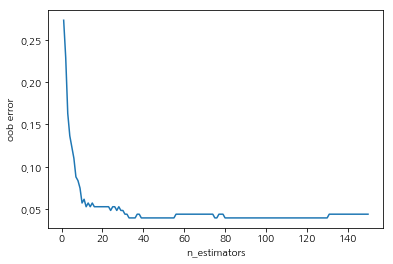

In [11]:
plt.plot(range(1,151),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [43]:
train_accuracy=[];val_accuracy=[]
para_depth=[depth for depth in range(1,21)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234, max_depth=v_max_depth, n_estimators=100)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    val_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesLeaf']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['ValidationAccuracy']=val_accuracy
df_accuracy_depth.round(3).head(5)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,1,0.943,0.936
1,2,0.974,0.942
2,3,0.978,0.942
3,4,0.996,0.942
4,5,0.996,0.947


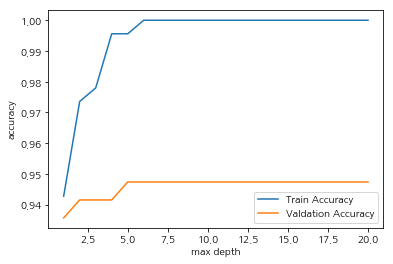

In [44]:
plt.plot(para_depth, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_depth, val_accuracy, linestyle='-',label='Valdation Accuracy')
plt.xlabel('max depth');plt.ylabel('accuracy')
plt.legend()

In [45]:
train_accuracy=[];val_accuracy=[]
para_split=[n_split for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,max_depth=10, n_estimators= 100, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    val_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesplit']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValidationAccuracy']=val_accuracy
df_accuracy_split.round(3).head(9)

,MinSamplesplit,TrainAccuracy,ValidationAccuracy
0,2,1.000,0.947
1,3,1.000,0.947
2,4,0.996,0.947
3,5,0.996,0.953
4,6,0.996,0.942
5,7,0.996,0.942
6,8,0.991,0.947
7,9,0.991,0.947
8,10,0.991,0.942


<function matplotlib.pyplot.legend(*args, **kwargs)>

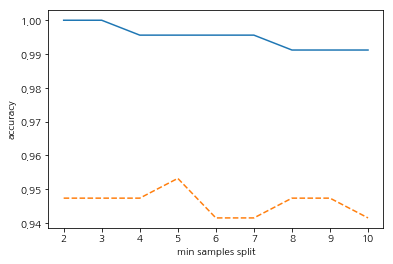

In [46]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, val_accuracy, linestyle='--', label='Validation Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend

In [53]:
train_accuracy=[];val_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234,max_depth=10, n_estimators= 100, min_samples_leaf=v_min_samples_leaf, min_samples_split=10)
    rf.fit(df_train_x,df_train_y)   
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    val_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesplit']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValidationAccuracy']=val_accuracy
df_accuracy_leaf.round(3).head(9)

,MinSamplesplit,TrainAccuracy,ValidationAccuracy
0,10,0.969,0.947
1,20,0.960,0.959
2,30,0.956,0.959
3,40,0.956,0.953
4,50,0.965,0.930
5,60,0.930,0.924
6,70,0.925,0.924
7,80,0.621,0.667
8,90,0.621,0.667


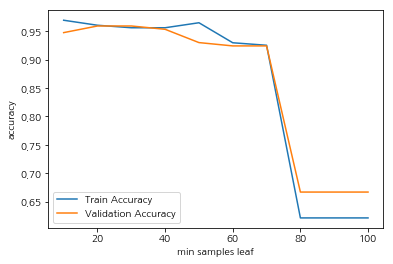

In [54]:
plt.plot(para_leaf, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_leaf, val_accuracy, linestyle='-',label='Validation Accuracy')
plt.xlabel('min samples leaf');plt.ylabel('accuracy')

plt.legend()

In [55]:
rf_final = RandomForestClassifier(random_state=1234,max_depth=10, n_estimators= 100, min_samples_leaf=20,  min_samples_split=10)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_val_x)
print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Accuracy on Validation set:{:.3f}'.format(rf_final.score(df_val_x,df_val_y)))
print('Accuracy on test set:{:.3f}\n'.format(rf_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_val_y,y_pred)))

Accuracy on training set:0.960
Accuracy on Validation set:0.959
Accuracy on test set:0.901

Confusion matrix:
[[114   0]
 [  7  50]]


In [56]:
v_feature_names=df_train_x.columns
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_names
df_importance['Importance']=rf_final.feature_importances_
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
22,worst perimeter,0.169
20,worst radius,0.141
7,mean concave points,0.136
2,mean perimeter,0.098
27,worst concave points,0.091
23,worst area,0.086
6,mean concavity,0.058
0,mean radius,0.057
13,area error,0.056
3,mean area,0.036


Text(0, 0.5, '설명변수')

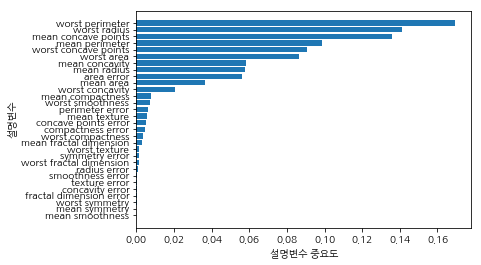

In [57]:
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [58]:
estimator=RandomForestClassifier()
parm_gird={'max_depth':para_depth, 'min_samples_split':para_split,'min_samples_leaf':para_leaf}

grid_dt=GridSearchCV(estimator,parm_gird,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

best parameter:
{'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 10}

best score:
0.974


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
